In [ ]:
## Diamond Price Predication

In [ ]:
### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Gemstone.csv')

In [9]:
df.shape

(20001, 12)

In [10]:
df

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,19996,0.70,Ideal,G,VS1,61.5,55.0,5.72,5.74,3.52,3027
19997,19997,19997,1.23,Very Good,H,VS2,61.5,59.0,6.88,6.92,4.24,6473
19998,19998,19998,1.00,Very Good,F,SI1,59.7,61.0,6.52,6.50,3.88,5713
19999,19999,19999,0.90,Premium,D,SI1,61.4,60.0,6.10,6.14,3.75,3889


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20001 non-null  int64  
 1   id          20001 non-null  int64  
 2   carat       20001 non-null  float64
 3   cut         20001 non-null  object 
 4   color       20001 non-null  object 
 5   clarity     20001 non-null  object 
 6   depth       20001 non-null  float64
 7   table       20001 non-null  float64
 8   x           20001 non-null  float64
 9   y           20001 non-null  float64
 10  z           20001 non-null  float64
 11  price       20001 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.8+ MB


In [12]:
df.head()

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
#No missing values in data
df.isnull().sum()

Unnamed: 0    0
id            0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [14]:
df

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,19996,0.70,Ideal,G,VS1,61.5,55.0,5.72,5.74,3.52,3027
19997,19997,19997,1.23,Very Good,H,VS2,61.5,59.0,6.88,6.92,4.24,6473
19998,19998,19998,1.00,Very Good,F,SI1,59.7,61.0,6.52,6.50,3.88,5713
19999,19999,19999,0.90,Premium,D,SI1,61.4,60.0,6.10,6.14,3.75,3889


In [15]:
## Lets drop the id column
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
#Check for duplicated records
df.duplicated().sum()

0

In [17]:
## Segregate numerical and catergorial columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numerical Columns:',numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical Columns: Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [18]:
df[categorical_columns].describe()

,cut,color,clarity
count,20001,20001,20001
unique,5,7,8
top,Ideal,G,SI1
freq,9579,4623,5420


In [19]:
df['cut'].value_counts()

cut
Ideal        9579
Premium      5149
Very Good    3852
Good         1204
Fair          217
Name: count, dtype: int64

In [20]:
df['color'].value_counts()

color
G    4623
E    3619
F    3518
H    3193
D    2566
I    1853
J     629
Name: count, dtype: int64

In [21]:
df['clarity'].value_counts()

clarity
SI1     5420
VS2     4976
SI2     3178
VS1     3176
VVS2    1647
VVS1    1085
IF       463
I1        56
Name: count, dtype: int64

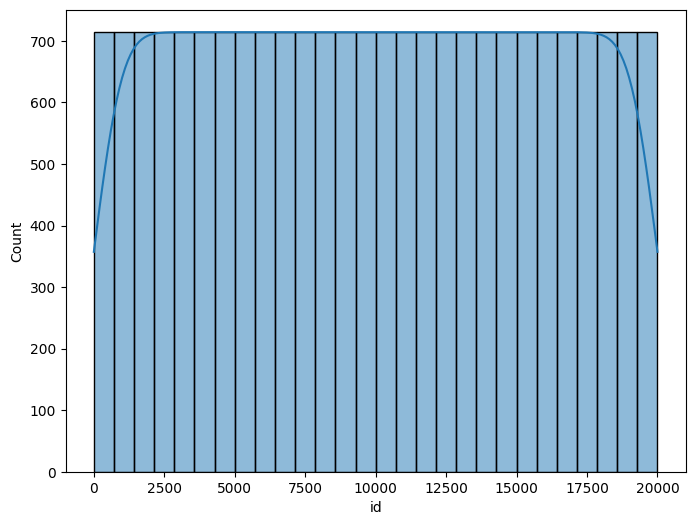

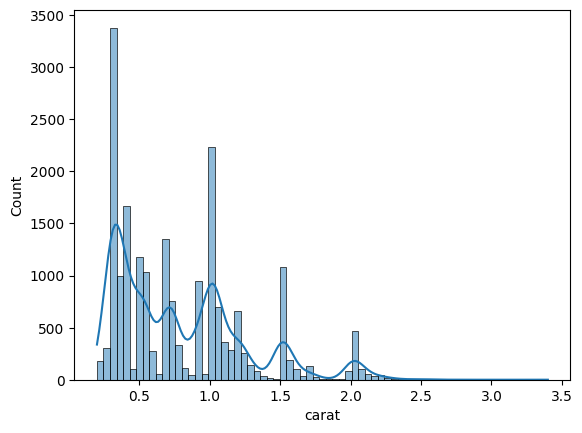

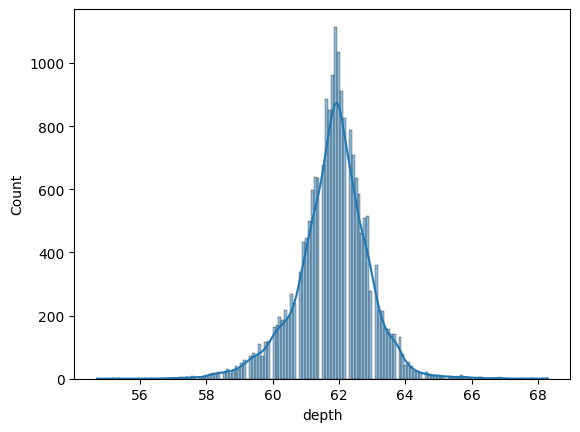

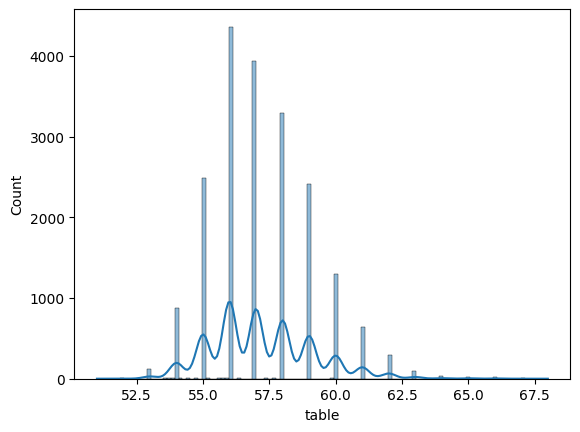

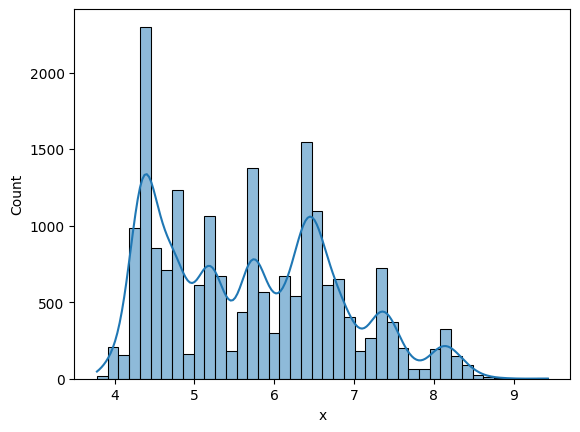

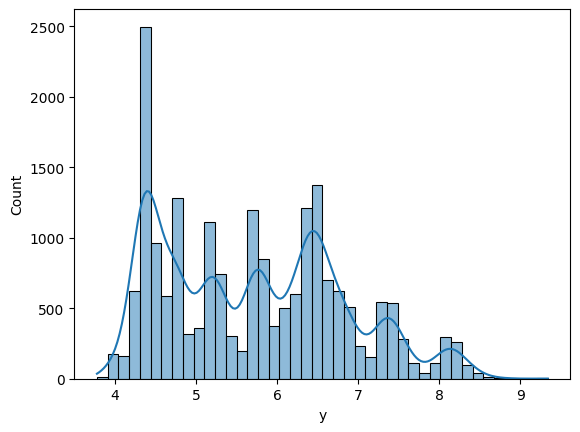

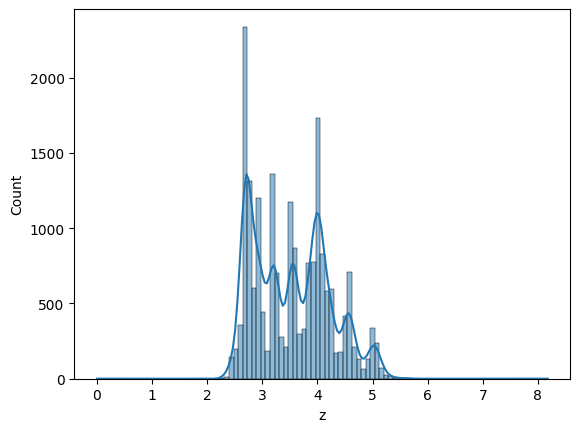

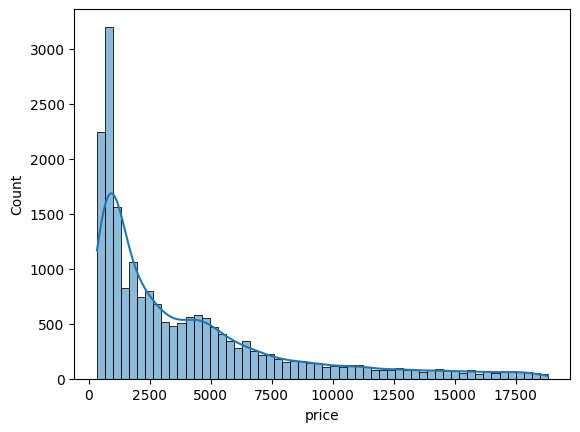

In [22]:
#distribution of numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()


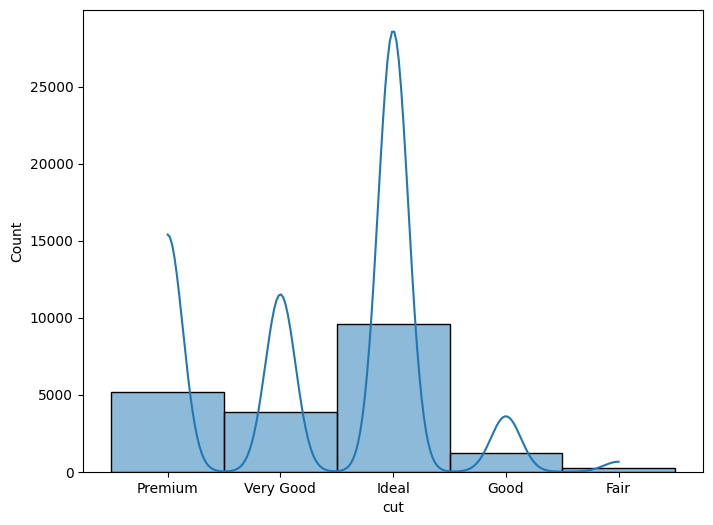

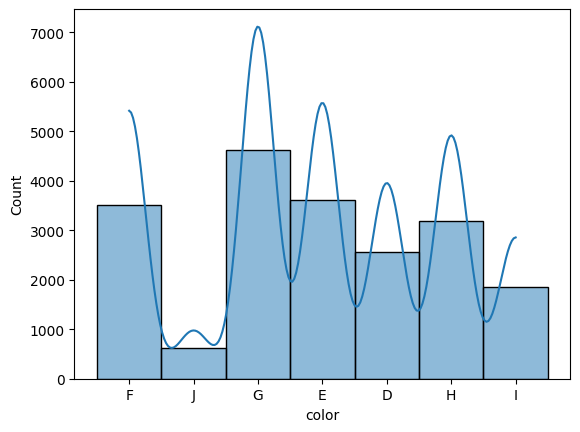

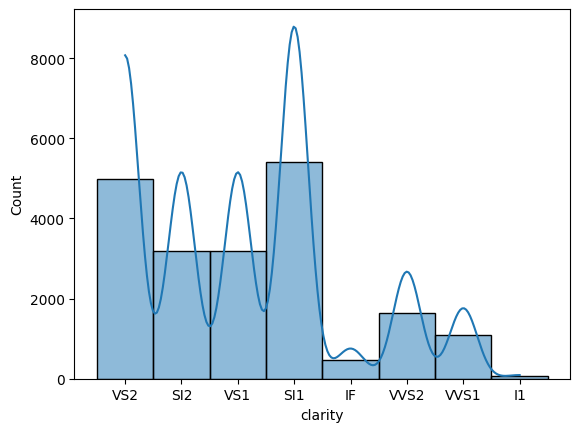

In [23]:
#For categorical variables
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [24]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [25]:
#Ranking(Mapping) the ordinal values in cut catogary
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [26]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [29]:
#Ranking(Mapping) the ordinal values in clarity catogary
clarity_map = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [28]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [30]:
color_map = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [34]:
df['cut']=df['cut'].replace(cut_map)

In [35]:
df['clarity']=df['clarity'].map(clarity_map)

In [36]:
df['color']=df['color'].map(color_map)

In [37]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
